In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score, precision_score,recall_score, f1_score

In [38]:
df = pd.read_csv("heart_disease.csv")

In [40]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [42]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

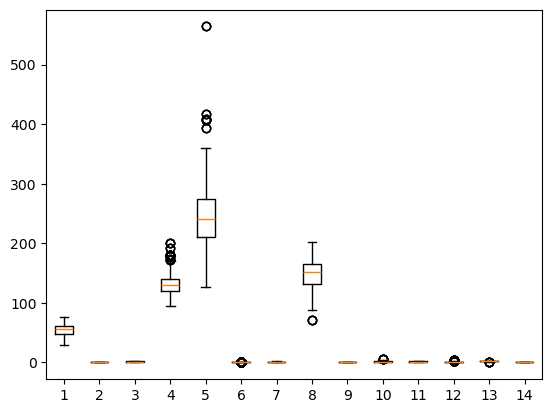

In [46]:
plt.boxplot(df)
plt.show()

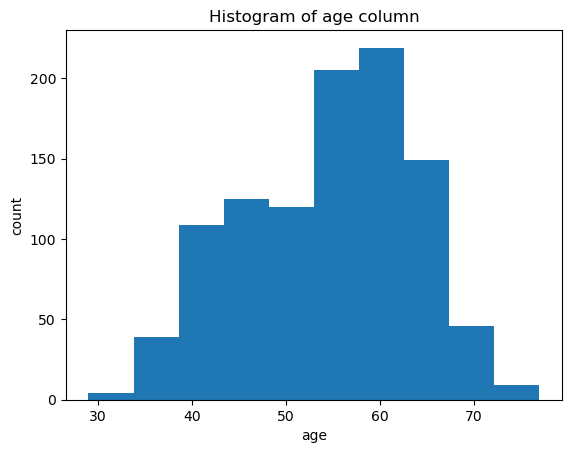

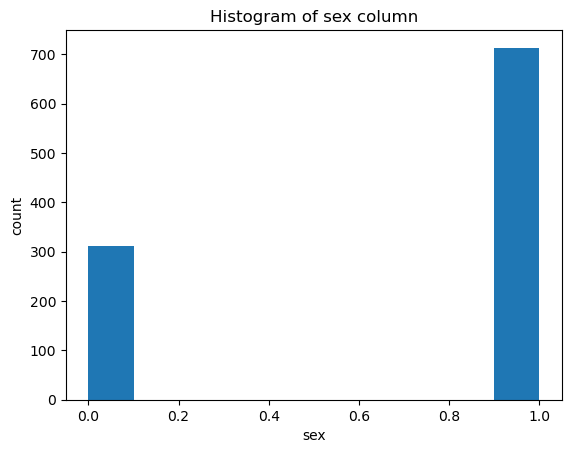

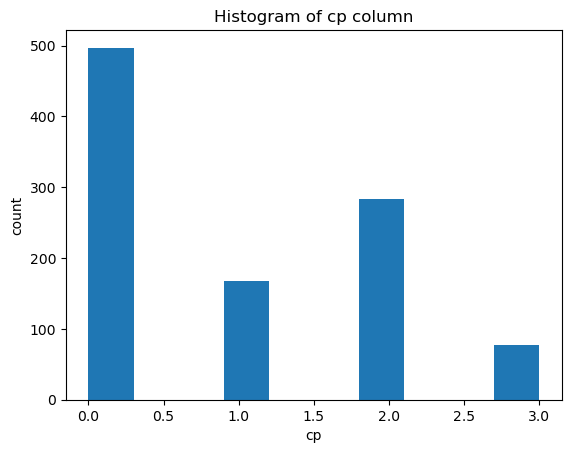

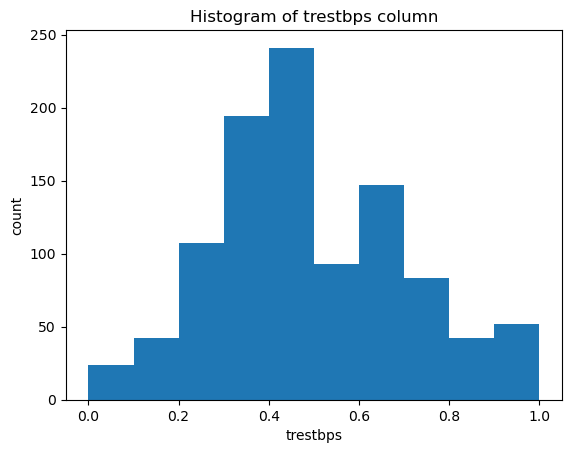

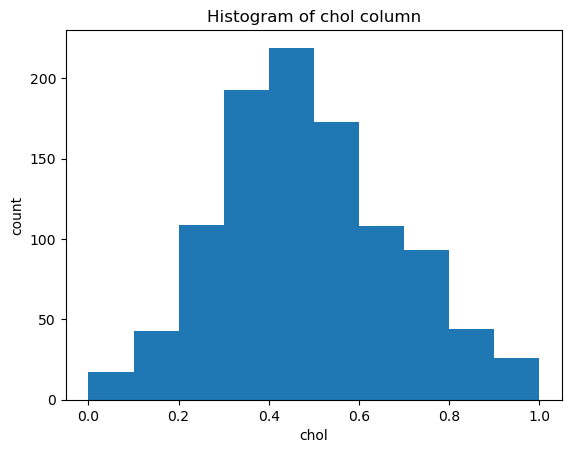

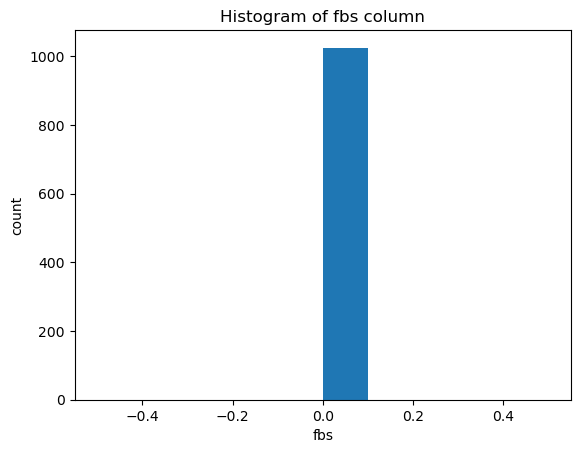

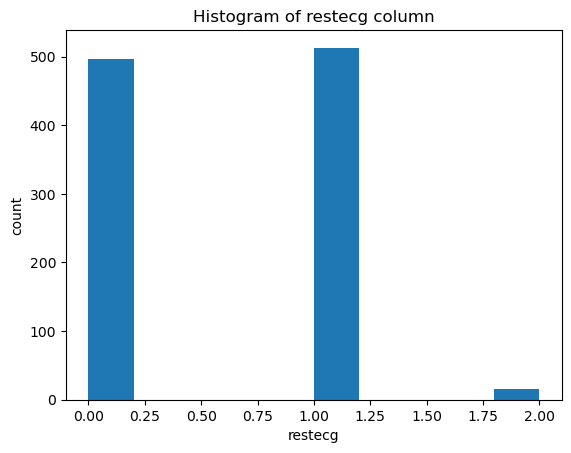

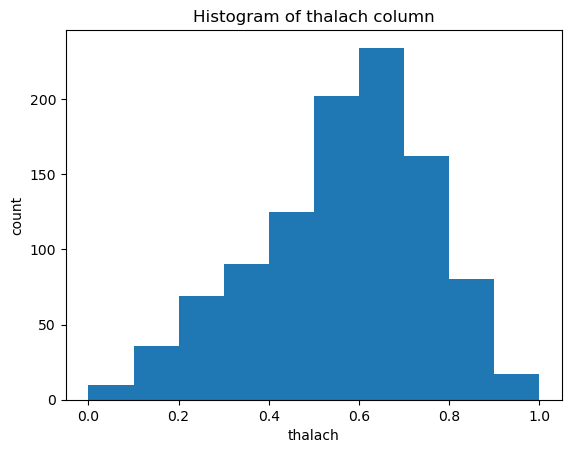

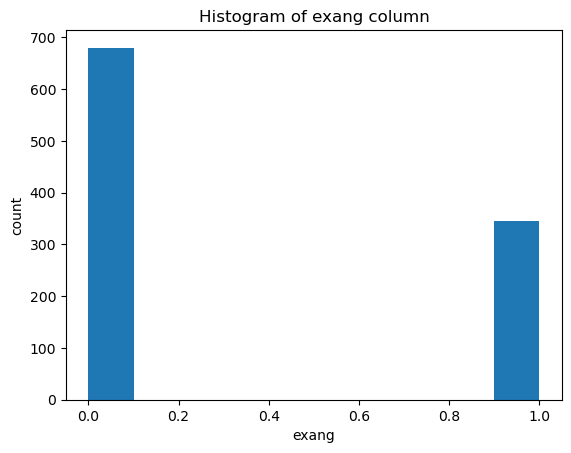

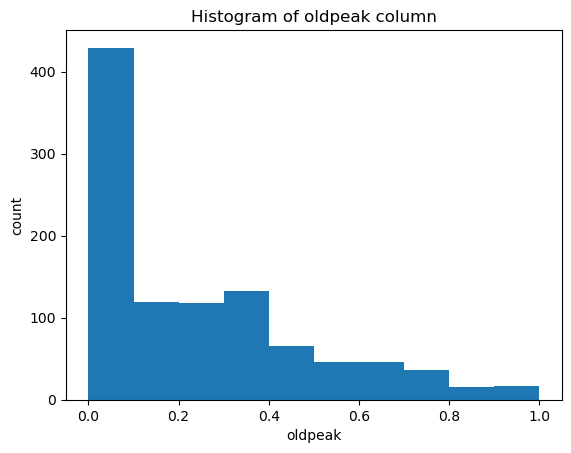

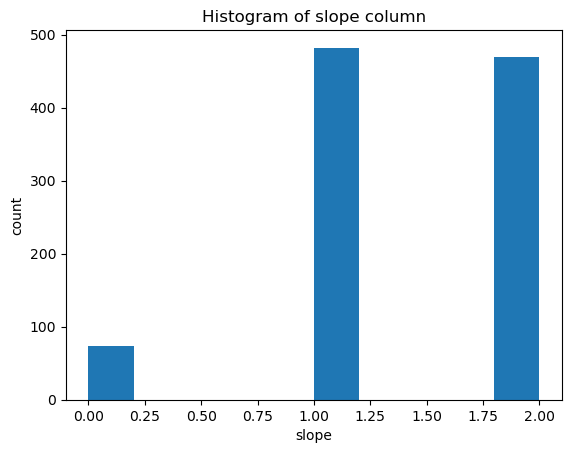

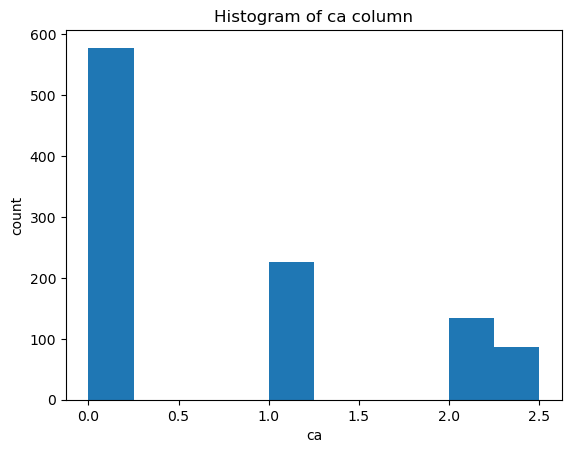

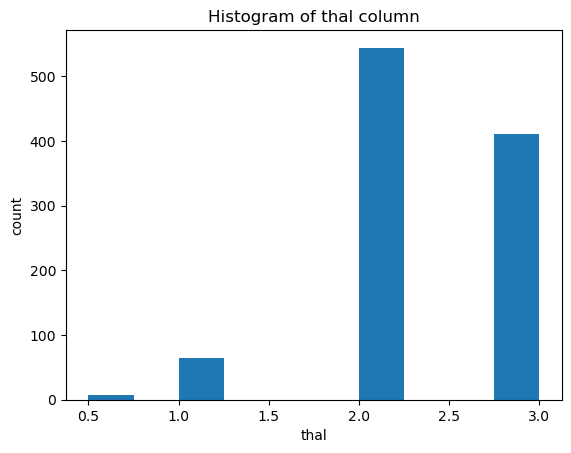

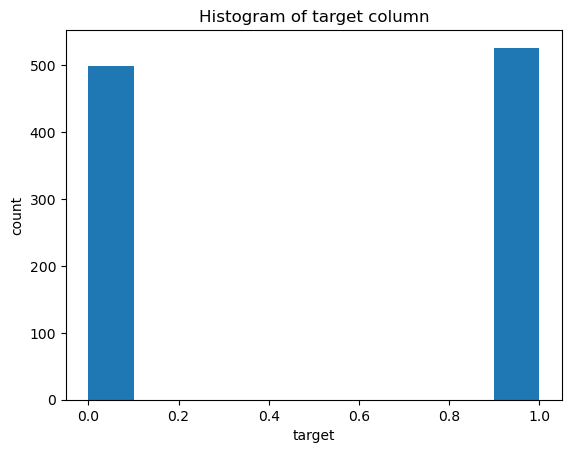

In [137]:
for col in df.columns:
  plt.hist(df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [139]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    df[column_name] = df[column_name].clip(upper=ub)
    df[column_name] = df[column_name].clip(lower=lb)
    return df[column_name]

In [50]:
num_cols = df.columns.tolist()
print(num_cols)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [52]:
for col in num_cols:
    df[col] = remove_outliers(df,col)

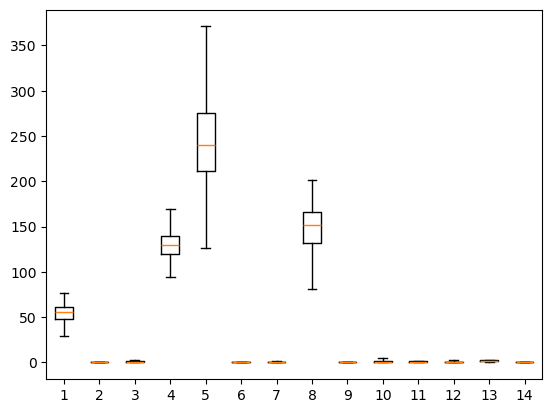

In [54]:
plt.boxplot(df)
plt.show()

In [141]:
df = pd.get_dummies(df,columns=['cp','restecg','thal'],prefix=['cp','restecg','thal'],dtype='int', drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,52,1,0.407895,0.351020,0,0.719008,0,0.222222,2,2.0,0,0,0,0,1,0,0,0,1
1,53,1,0.605263,0.314286,0,0.611570,1,0.688889,0,0.0,0,0,0,0,0,0,0,0,1
2,70,1,0.671053,0.195918,0,0.363636,1,0.577778,0,0.0,0,0,0,0,1,0,0,0,1
3,61,1,0.710526,0.314286,0,0.661157,0,0.000000,2,1.0,0,0,0,0,1,0,0,0,1
4,62,0,0.578947,0.685714,0,0.206612,0,0.422222,1,2.5,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,0.605263,0.387755,0,0.685950,1,0.000000,2,0.0,1,1,0,0,1,0,0,1,0
1021,60,1,0.407895,0.538776,0,0.495868,1,0.622222,1,1.0,0,0,0,0,0,0,0,0,1
1022,47,1,0.210526,0.608163,0,0.305785,1,0.222222,1,1.0,0,0,0,0,0,0,0,1,0
1023,50,0,0.210526,0.522449,0,0.644628,0,0.000000,2,0.0,1,0,0,0,0,0,0,1,0


In [56]:
minmax_scaled = MinMaxScaler(feature_range=(0,1))
df[['trestbps','chol','thalach','oldpeak']]= minmax_scaled.fit_transform(df[['trestbps','chol','thalach','oldpeak']])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,0.407895,0.351020,0,1,0.719008,0,0.222222,2,2.0,3.0,0
1,53,1,0,0.605263,0.314286,0,0,0.611570,1,0.688889,0,0.0,3.0,0
2,70,1,0,0.671053,0.195918,0,1,0.363636,1,0.577778,0,0.0,3.0,0
3,61,1,0,0.710526,0.314286,0,1,0.661157,0,0.000000,2,1.0,3.0,0
4,62,0,0,0.578947,0.685714,0,1,0.206612,0,0.422222,1,2.5,2.0,0


In [58]:
y_reg=df['chol']
X_reg=df.drop('chol',axis=1)
X_reg_train,X_reg_test,y_reg_train,y_reg_test = train_test_split(X_reg,y_reg,test_size=.2,random_state=2)

In [60]:
y_class = df['target']
X_class = df.drop('target', axis=1)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=2)

In [65]:
lr_model = LinearRegression()
lr_model.fit(X_reg_train,y_reg_train)
predicted_lr_values = lr_model.predict(X_reg_test)

In [67]:
print("Intercept: ", lr_model.intercept_)
print("Coefficient: ", lr_model.coef_)

Intercept:  0.2341565140464293
Coefficient:  [ 3.44595014e-03 -8.84800207e-02 -1.11029760e-02  5.73350552e-02
 -1.38777878e-17 -2.77715252e-02  8.67319047e-02  2.49093467e-02
  1.33000835e-02  2.67393471e-02 -2.66266677e-03  2.01604015e-02
 -4.01281918e-02]


In [73]:
logr_model = LogisticRegression()
logr_model.fit(X_class_train,y_class_train)
predicted_logr_values = logr_model.predict(X_class_test)

C:\Users\S Muhammed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_class_train, y_class_train)
predicted_knn_values = knn_model.predict(X_class_test)
predicted_knn_values

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0], dtype=int64)

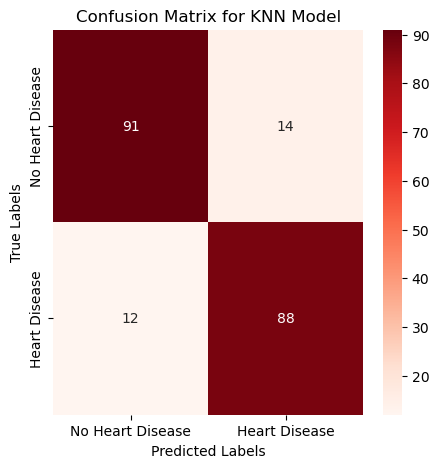

In [101]:
cm= confusion_matrix(y_class_test,predicted_knn_values)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True , fmt="d",cmap="Reds",xticklabels=["No Heart Disease","Heart Disease"],yticklabels=["No Heart Disease","Heart Disease"])
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [107]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_class_train, y_class_train)

predicted_nb_values = naive_bayes.predict(X_class_test)

In [111]:
mae = mean_absolute_error(y_reg_test, predicted_lr_values)
mse = mean_squared_error(y_reg_test, predicted_lr_values)
r_squared = r2_score(y_reg_test, predicted_lr_values)

metrics = {
    'Metric': ['MAE', 'MSE', 'R2 Score'],
    'Value': [mae, mse, r_squared]
}

metrics_df = pd.DataFrame(metrics)

print("\nLinear Regression Evaluation")
metrics_df


Linear Regression Evaluation


,Metric,Value
0,MAE,0.137886
1,MSE,0.030535
2,R2 Score,0.159872


In [129]:
test_accuracy = accuracy_score(y_class_test, predicted_logr_values)
test_precision = precision_score(y_class_test, predicted_logr_values, average='weighted')
test_recall = recall_score(y_class_test, predicted_logr_values, average='weighted')
test_f1 = f1_score(y_class_test, predicted_logr_values, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

print("\nLogistic Regression Evaluation")
metrics_df


Logistic Regression Evaluation


,Metric,Value
0,Accuracy,0.843902
1,Precision,0.853035
2,Recall,0.843902
3,F1 Score,0.843247


In [131]:
test_accuracy = accuracy_score(y_class_test, predicted_knn_values)
test_precision = precision_score(y_class_test, predicted_knn_values, average='weighted')
test_recall = recall_score(y_class_test, predicted_knn_values, average='weighted')
test_f1 = f1_score(y_class_test, predicted_knn_values, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

print("\nK-Nearest Neighbours Evaluation")
metrics_df


K-Nearest Neighbours Evaluation


,Metric,Value
0,Accuracy,0.873171
1,Precision,0.873373
2,Recall,0.873171
3,F1 Score,0.873189


In [135]:
test_accuracy = accuracy_score(y_class_test, predicted_nb_values)
test_precision = precision_score(y_class_test, predicted_nb_values, average='weighted')
test_recall = recall_score(y_class_test, predicted_nb_values, average='weighted')
test_f1 = f1_score(y_class_test, predicted_nb_values, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

print("\nNaive Bayes Evaluation")
metrics_df


Naive Bayes Evaluation


,Metric,Value
0,Accuracy,0.878049
1,Precision,0.880019
2,Recall,0.878049
3,F1 Score,0.878008
